In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
escale = pd.read_csv('./Data_purple_air/escale.csv', sep=',')
escale['Date'] = pd.to_datetime(escale['Date_depart']).dt.date
escale['Time'] = pd.to_datetime(escale['Date_depart']).dt.time


In [11]:
escale2 = pd.read_csv('./Data_purple_air/escale.csv', sep=',')
escale2['Date'] = pd.to_datetime(escale2['Date_arrive']).dt.date
escale2['Time'] = pd.to_datetime(escale2['Date_arrive']).dt.time

In [4]:
escale

,Ville,Bateau,Date_depart,Date_arrive,Pays_depart,Pays_arrive,Date,Time
0,Marseille,CELEBRITY BEYOND,28/08/2022 06:54,28/08/2022 18:20,BARCELONA,MARSEILLE,2022-08-28,06:54:00
1,Marseille,MSC OPERA,29/08/2022 07:27,29/08/2022 16:04,GENOVA,BARCELONA,2022-08-29,07:27:00
2,Marseille,WONDER OF THE SEAS,30/08/2022 08:10,30/08/2022 18:10,PALMA DE MALLORCA,MARSEILLE,2022-08-30,08:10:00
3,Marseille,COSTA FIRENZE,02/09/2022 08:27,02/09/2022 19:19,GENOVA,BARCELONA,2022-02-09,08:27:00
4,Marseille,MSC SEASIDE,02/09/2022 10:50,02/09/2022 19:07,VALENCIA,GENOVA,2022-02-09,10:50:00
...,...,...,...,...,...,...,...,...
85,Marseille,VISION OF THE SEAS,05/10/2022 07:00,05/10/2022 18:00,Inconnu,Inconnu,2022-05-10,07:00:00
86,Marseille,SPIRIT OF ADVENTURE,06/10/2022 07:00,06/10/2022 17:00,Inconnu,Inconnu,2022-06-10,07:00:00
87,Marseille,MSC POESIA,06/10/2022 08:00,06/10/2022 17:00,GENOVA,PALMA DE MALLORCA,2022-06-10,08:00:00
88,Marseille,COSTA FASCINOSA,06/10/2022 09:00,06/10/2022 17:00,Inconnu,Inconnu,2022-06-10,09:00:00


In [5]:
capteur = pd.read_csv('.\Data_purple_air\Bovis (outside) (43.36449 5.319078) Primary 10_minute_average 08_28_2022 10_06_2022.csv', sep=',')
capteur['Date'] = pd.to_datetime(capteur['created_at']).dt.date
capteur['Time'] = pd.to_datetime(capteur['created_at']).dt.time


In [6]:
capteur

,created_at,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 9,Date,Time
0,2022-08-28 00:00:00 UTC,10.30,13.39,13.57,15488.0,-53.0,84.0,41.0,13.39,NaN,2022-08-28,00:00:00
1,2022-08-28 00:10:00 UTC,10.60,13.37,13.51,15498.0,-51.8,83.6,41.2,13.37,NaN,2022-08-28,00:10:00
2,2022-08-28 00:20:00 UTC,10.37,13.09,13.22,15508.0,-51.8,83.4,42.0,13.09,NaN,2022-08-28,00:20:00
3,2022-08-28 00:30:00 UTC,10.10,12.52,12.81,15518.0,-52.8,83.2,42.0,12.52,NaN,2022-08-28,00:30:00
4,2022-08-28 00:40:00 UTC,10.43,13.25,13.48,15528.0,-52.0,83.0,42.6,13.25,NaN,2022-08-28,00:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...
5663,2022-10-06 23:10:00 UTC,7.21,9.30,9.66,16903.0,-51.4,74.0,49.0,9.30,NaN,2022-10-06,23:10:00
5664,2022-10-06 23:20:00 UTC,7.24,9.25,9.58,16913.0,-52.4,73.0,49.0,9.25,NaN,2022-10-06,23:20:00
5665,2022-10-06 23:30:00 UTC,7.56,9.65,9.80,16923.0,-51.2,73.0,49.0,9.65,NaN,2022-10-06,23:30:00
5666,2022-10-06 23:40:00 UTC,7.89,9.80,10.02,16933.0,-52.2,73.0,49.0,9.80,NaN,2022-10-06,23:40:00


In [46]:
df_merged = pd.merge(escale2, capteur, on=['Date','Time'], how='inner')

In [13]:
df_merged

,Ville,Bateau,Date_depart,Date_arrive,Pays_depart,Pays_arrive,Date,Time,created_at,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 9
0,Marseille,CELEBRITY BEYOND,28/08/2022 06:54,28/08/2022 18:20,BARCELONA,MARSEILLE,2022-08-28,18:20:00,2022-08-28 18:20:00 UTC,15.10,19.01,19.16,16589.0,-51.4,87.8,43.0,19.01,NaN
1,Marseille,WONDER OF THE SEAS,30/08/2022 08:10,30/08/2022 18:10,PALMA DE MALLORCA,MARSEILLE,2022-08-30,18:10:00,2022-08-30 18:10:00 UTC,5.61,6.98,7.22,19459.0,-61.0,85.8,61.2,6.98,NaN
2,Marseille,COSTA FIRENZE,16/09/2022 08:29,16/09/2022 19:20,GENOVA,BARCELONA,2022-09-16,19:20:00,2022-09-16 19:20:00 UTC,4.16,5.90,6.10,3400.0,-52.2,80.2,31.0,5.90,NaN
3,Marseille,MSC SEASIDE,16/09/2022 11:06,16/09/2022 19:10,VALENCIA,GENOVA,2022-09-16,19:10:00,2022-09-16 19:10:00 UTC,3.64,4.87,4.96,3390.0,-52.4,80.4,30.8,4.87,NaN
4,Marseille,OOSTERDAM,17/09/2022 06:30,17/09/2022 18:00,BARCELONA,VILLEFRANCHE-SUR-MER,2022-09-17,18:00:00,2022-09-17 18:00:00 UTC,0.00,0.14,0.27,4760.0,-52.8,71.0,29.8,0.14,NaN
5,Marseille,WESTERDAM,17/09/2022 07:00,17/09/2022 18:00,Inconnu,Inconnu,2022-09-17,18:00:00,2022-09-17 18:00:00 UTC,0.00,0.14,0.27,4760.0,-52.8,71.0,29.8,0.14,NaN
6,Marseille,MSC SEAVIEW,17/09/2022 06:45,17/09/2022 17:00,BARCELONA,GENOVA,2022-09-17,17:00:00,2022-09-17 17:00:00 UTC,0.04,0.05,0.09,4700.0,-53.4,74.6,26.6,0.05,NaN
7,Marseille,COSTA TOSCANA,17/09/2022 13:00,17/09/2022 19:00,Inconnu,Inconnu,2022-09-17,19:00:00,2022-09-17 19:00:00 UTC,0.03,0.09,0.09,4820.0,-54.2,69.0,31.6,0.09,NaN
8,Marseille,MSC GRANDIOSA,20/09/2022 09:00,20/09/2022 18:00,BARCELONA,CIVITAVECCHIA,2022-09-20,18:00:00,2022-09-20 18:00:00 UTC,0.63,0.99,1.12,9081.0,-51.6,80.4,23.6,0.99,NaN
9,Marseille,COSTA SMERALDA,25/09/2022 08:15,25/09/2022 18:00,SAVONA,BARCELONA,2022-09-25,18:00:00,2022-09-25 18:00:00 UTC,0.89,1.49,1.62,754.0,-51.6,78.0,36.2,1.49,NaN


In [14]:
import matplotlib.pyplot as plt

data = df_merged['PM2.5_CF1_ug/m3']
mean = data.mean()

print(mean)


2.3278947368421057


In [44]:
df_filtered = capteur.loc[capteur['PM2.5_CF1_ug/m3'] > 15 ]
df_filtered2 = capteur.loc[capteur['created_at'] == "2022-10-01 00:00:00 UTC" ]
df_filtered2


,created_at,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 9,Date,Time
4804,2022-10-01 00:00:00 UTC,1.16,1.78,1.86,8313.0,-51.8,63.0,45.0,1.78,NaN,2022-10-01,00:00:00


In [35]:

# 2022-10-01 00:00:00 UTC,1.16,1.78,1.86,8313.00,-51.80,63.00,45.00,1.78

,created_at,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 9,Date,Time


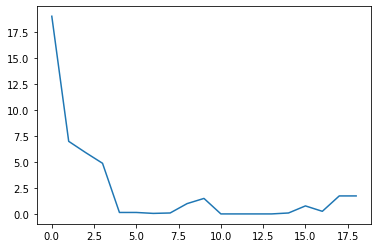

In [15]:
plt.plot(data)


12:39:56
